In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, pipeline, preprocessing
import itertools

%matplotlib inline

# How Much is Your Car Worth?
This project was designed to provide more practice using linear and polynomial regressions.  The data on car prices used for this project is included in the repository. 


In [2]:
df = pd.read_csv("car_data.csv")

# Observations:
#### The linear regression equation for mileage vs. price would be y = -0.17x + 24764.56. After testing varying degree polynomial regression equations, there was not enough of a difference found to support using anything other than the simple linear regression equation.  All of the R<sup>2</sup> scores were about 0.02, making all the regression equations poor fits for the data.  The graphical representation below shows a scatter plot of the data points along with the linear regression used to find the equation.  



In [3]:
X = df[['Mileage']]
y = df[['Price']]

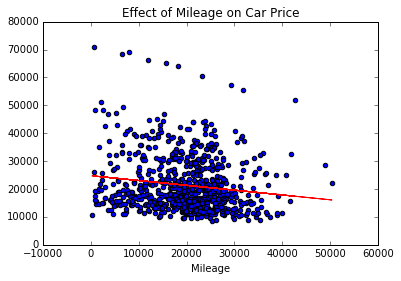

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.scatter(X, y)
plt.plot(X, regr.predict(X), color='red')
plt.xlabel('Mileage')
# plt.ylabel('Price')
plt.title('Effect of Mileage on Car Price')
plt.show()

# Observations:
#### When including more data from our DataFrame, the R<sup>2</sup> score greatly increases. Using mileage, cylinders, liters, doors, cruise, sound, and leather vs. price increased the R<sup>2</sup> score to about 0.45.  When tests were run caluculating the R<sup>2</sup> score for various polynomial regressions, the R<sup>2</sup> score increased even more.  With an eight degree polynomial regression, the R<sup>2</sup> score rose to about 0.91; however, this regression may be overfitting the data and not provide the best predictions for unknown data.  The simple linear regression equation would be y = β0 + β1 x +...+βn xn.


β0 = intercept = 6758.7551436  
β1 = coefficientMileage = -1.69747832e-01  
β2 = coefficientCylinder = 3.79237893e+03  
β3 = coefficientLiter = -7.87220732e+02  
β4 = coefficientDoors = -1.54274585e+03  
β5 = coefficientCruise = 6.28899715e+03  
β6 = coefficientSound = -1.99379528e+03  
β7 = coefficientLeather = 3.34936162e+03  

In [6]:
cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X_many = df[cols]

lin_reg = linear_model.LinearRegression()
result = lin_reg.fit(X_many,y)
r_score = lin_reg.score(X_many,y)
print('R Score: {}'.format(r_score))

R Score: 0.446264353672838


In [7]:
combinations = []
for x in range(1, 8):
    combinations.append(itertools.combinations(cols, x))

best_score = 0
for com in combinations:
    for group in com:
        group = list(group)
        price_x = df[group]
        degrees = 9

        for degree in range(degrees):
            model = pipeline.Pipeline([
                ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                ('linear', linear_model.LinearRegression(fit_intercept=False))])

            model = model.fit(price_x, y)
            model_score = model.score(price_x, y)
        if best_score < model.score(price_x, y):
            best_score = model.score(price_x, y)
            max_group = group
            max_degree = degree
print('Polynomial Degree: {}, Included Columns: {}, R Score: {}'.format(degree, max_group, best_score))

Polynomial Degree: 8, Included Columns: ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], R Score: 0.9091302554128333


# Observations
#### Having more numerical data provides more opportunities to manipulate the data and come to more conclusions.  The data that was not originally numerical, was provided a numerical representation through the use of scikit-learn's LabelEncoder method.  The data points that were added include make, model, and type. Once these columns were able to be added to our possible combinations, the R<sup>2</sup> score was again increased; however, not by as much.  With seven columns being compared to price, our R<sup>2</sup> score was about 0.45; with 10 columns being compared to price, our R<sup>2</sup> score increased to about 0.49.  Due to these three added data sets being categorical, they are better understood on separate graphs, which can be seen below. Again, a higher polynomial regression increases the R<sup>2</sup> score by overfitting the data. 


In [8]:
old_columns = ['Make', 'Model', 'Type']
new_columns = ['Make_Number', 'Model_Number', 'Type_Number']
for index, item in enumerate(old_columns):
    le = preprocessing.LabelEncoder()
    le.fit(df[item])
    df[new_columns[index]] = le.transform(df[item])
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Number,Model_Number,Type_Number
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0,10,3
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0,10,3


In [9]:
columns = ['Mileage', 'Make_Number', 'Model_Number', 'Type_Number', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = df[columns]
y = df['Price']
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
print('R Score: {}'.format(lin_reg.score(X, y)))

R Score: 0.48569139005488504


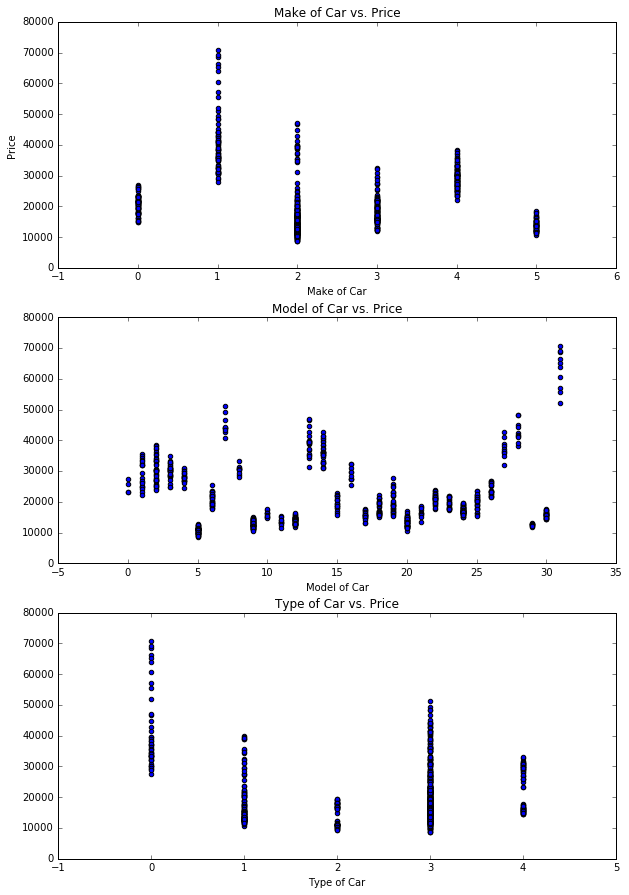

In [10]:
y = df['Price']
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(311)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.scatter(df['Make_Number'], y)
ax2.scatter(df['Model_Number'], y)
ax3.scatter(df['Type_Number'], y)

# Set common labels
ax.set_ylabel('Price')

ax1.set_title('Make of Car vs. Price')
ax1.set_xlabel('Make of Car')
ax2.set_title('Model of Car vs. Price')
ax2.set_xlabel('Model of Car')
ax3.set_title('Type of Car vs. Price')
ax3.set_xlabel('Type of Car')

In [11]:
combinations = []
for x in range(1, 11):
    combinations.append(itertools.combinations(columns, x))

In [12]:
best_score = 0
for com in combinations:
    for group in com:
        group = list(group)
        price_x = df[group]
        degrees = 5

        for degree in range(degrees):
            model = pipeline.Pipeline([
                ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                ('linear', linear_model.LinearRegression(fit_intercept=False))])

            model = model.fit(price_x, y)
            model_score = model.score(price_x, y)
        if best_score < model.score(price_x, y):
            best_score = model.score(price_x, y)
            max_group = group
            max_degree = degree
print(degree, max_group, best_score)

4 ['Make_Number', 'Model_Number', 'Type_Number', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.965732128139
